https://github.com/iobis/obistools#installation

In [1]:
library(obistools)

In [2]:
names <- c(
    "Abra alva", "Buccinum fusiforme", "Buccinum fusiforme",
    "Buccinum fusiforme", "hlqsdkf"
)

match_taxa(names)

3 names, 1 without matches, 1 with multiple matches


Proceed to resolve names (y/n/info)? y
  AphiaID     scientificname      authority     status match_type
1  531014 Buccinum fusiforme   Kiener, 1834 unaccepted      exact
2  510389 Buccinum fusiforme Broderip, 1830 unaccepted      exact


Buccinum fusiforme


Multiple matches, pick a number or leave empty to skip: 


,scientificName,scientificNameID,match_type
1,Abra alba,urn:lsid:marinespecies.org:taxname:141433,near_1
2,NA,NA,NA
2.1,NA,NA,NA
2.2,NA,NA,NA
3,NA,NA,NA


In [3]:
data <- data.frame(
  occurrenceID = c("1", "2", "3"),
  scientificName = c("Abra alba", NA, ""),
  locality = c("North Sea", "English Channel", "Flemish Banks"),
  minimumDepthInMeters = c("10", "", "5")
)

check_fields(data)

field,level,message,row
eventDate,error,Required field eventDate is missing,NA
decimalLongitude,error,Required field decimalLongitude is missing,NA
decimalLatitude,error,Required field decimalLatitude is missing,NA
scientificNameID,error,Required field scientificNameID is missing,NA
occurrenceStatus,error,Required field occurrenceStatus is missing,NA
basisOfRecord,error,Required field basisOfRecord is missing,NA
scientificName,error,Empty value for required field scientificName,2
scientificName,error,Empty value for required field scientificName,3


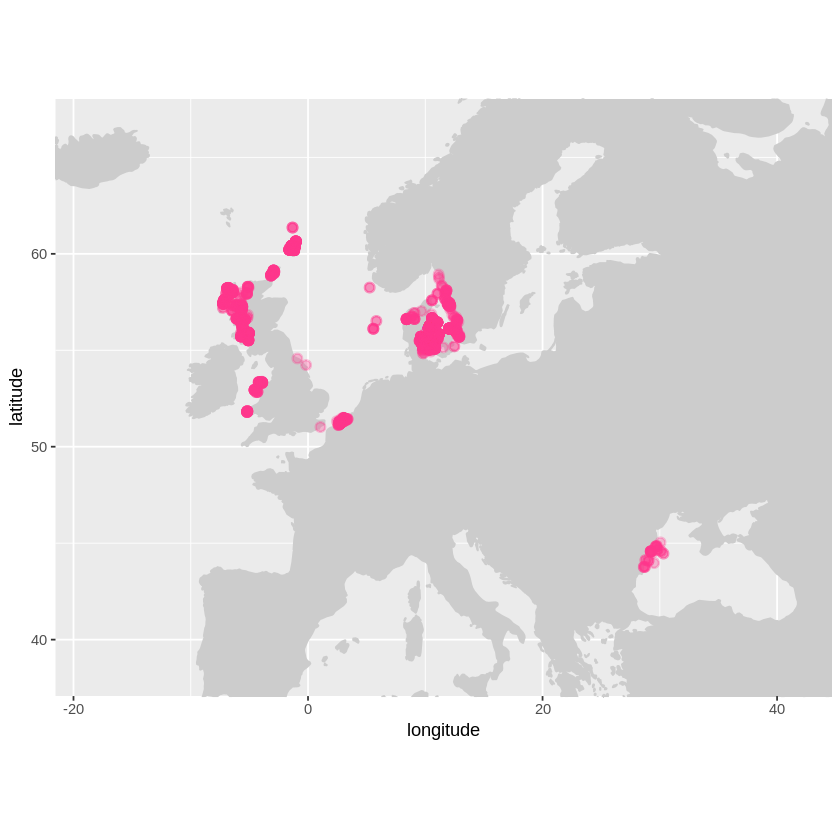

In [4]:
plot_map(abra, zoom=TRUE)

HTML widgets cannot be represented in plain text (need html)
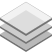
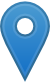

In [5]:
plot_map_leaflet(abra)

```R
plot_map(abra, zoom=TRUE)

identify_map(abra)
```

In [6]:
check_onland(abra)

,id,decimalLongitude,decimalLatitude,basisOfRecord,eventDate,institutionCode,collectionCode,catalogNumber,locality,datasetName,⋯,individualCount,eventID,depth,minimumDepthInMeters,maximumDepthInMeters,fieldNumber,occurrenceRemarks,eventTime,footprintWKT,identifiedBy
31,365512845,-0.9092748,54.57467,Occurrence,2011-09-03 10:00:00,Yorkshire Naturalists' Union Marine and Coastal Se,60051,261729389,Skinningrove. Cattersty Sands,Yorkshire Naturalists Union Marine and Coastal Section Records,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


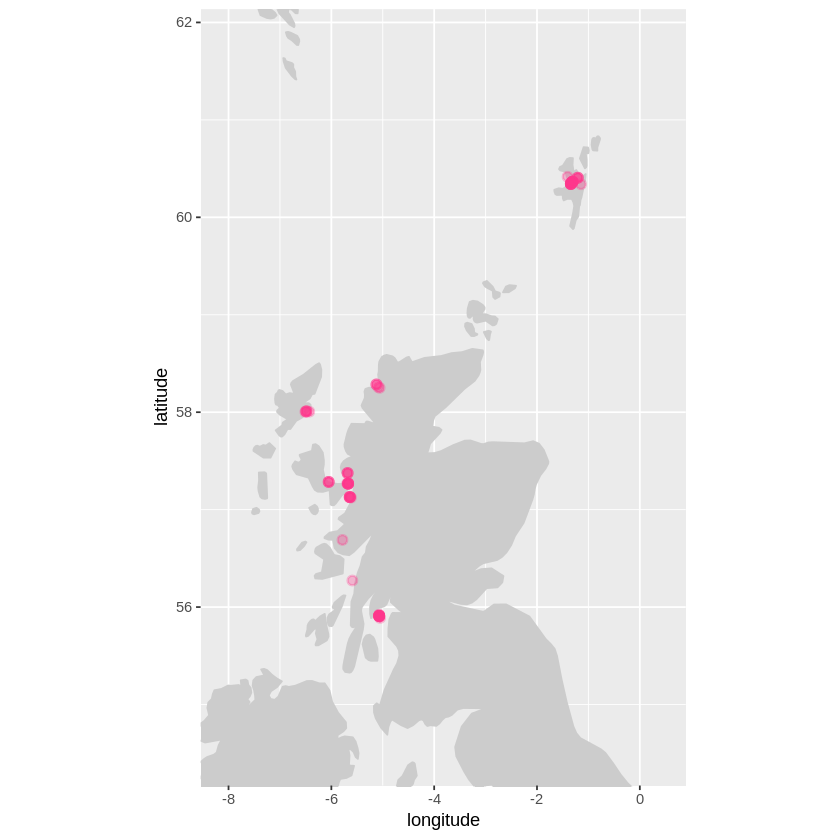

In [7]:
plot_map(check_depth(abra, depthmargin=50), zoom=TRUE)

In [8]:
report <- check_depth(abra, report=T, depthmargin=50)

head(report)

field,level,row,message
minimumDepthInMeters,warning,1209,"Depth value (52.9) is greater than the value found in the bathymetry raster (depth=-27.0, margin=50)"
minimumDepthInMeters,warning,1226,"Depth value (62.3) is greater than the value found in the bathymetry raster (depth=4.4, margin=50)"
minimumDepthInMeters,warning,1232,"Depth value (64.9) is greater than the value found in the bathymetry raster (depth=5.8, margin=50)"
minimumDepthInMeters,warning,1235,"Depth value (61.2) is greater than the value found in the bathymetry raster (depth=4.0, margin=50)"
minimumDepthInMeters,warning,1249,"Depth value (68.3) is greater than the value found in the bathymetry raster (depth=8.0, margin=50)"
minimumDepthInMeters,warning,1250,"Depth value (72.9) is greater than the value found in the bathymetry raster (depth=5.0, margin=50)"


In [9]:
data <- data.frame(
  eventID=c("a", "b", "c", "d", "e", "f"),
  parentEventID=c("", "", "a", "a", "bb", "b"),
  stringsAsFactors=FALSE
)

check_eventids(data)

field,level,row,message
parentEventID,error,5,parentEventID bb has no corresponding eventID


In [10]:
event <- data.frame(
  eventID=c("cruise_1", "station_1", "station_2", "sample_1", "sample_2", "sample_3", "sample_4", "subsample_1", "subsample_2"),
  parentEventID=c(NA, "cruise_1", "cruise_1", "station_1", "station_1", "station_2", "station_2", "sample_3", "sample_3"),
  eventDate=c(NA, NA, NA, "2017-01-01", "2017-01-02", "2017-01-03", "2017-01-04", NA, NA),
  decimalLongitude=c(NA, 2.9, 4.7, NA, NA, NA, NA, NA, NA),
  decimalLatitude=c(NA, 54.1, 55.8, NA, NA, NA, NA, NA, NA),
  stringsAsFactors=FALSE
)

occurrence <- data.frame(
  eventID=c("sample_1", "sample_1", "sample_2", "sample_28", "sample_3", "sample_4", "subsample_1", "subsample_1"),
  scientificName=c("Abra alba", "Lanice conchilega", "Pectinaria koreni", "Nephtys hombergii", "Pectinaria koreni", "Amphiura filiformis", "Desmolaimus zeelandicus", "Aponema torosa"),
  stringsAsFactors=FALSE
)

check_extension_eventids(event, occurrence)

field,level,row,message
eventID,error,4,eventID sample_28 has no corresponding eventID in the core


In [11]:
event <- data.frame(
  eventID=c("cruise_1", "station_1", "station_2", "sample_1", "sample_2", "sample_3", "sample_4", "subsample_1", "subsample_2"),
  parentEventID=c(NA, "cruise_1", "cruise_1", "station_1", "station_1", "station_2", "station_2", "sample_3", "sample_3"),
  eventDate=c(NA, NA, NA, "2017-01-01", "2017-01-02", "2017-01-03", "2017-01-04", NA, NA),
  decimalLongitude=c(NA, 2.9, 4.7, NA, NA, NA, NA, NA, NA),
  decimalLatitude=c(NA, 54.1, 55.8, NA, NA, NA, NA, NA, NA),
  stringsAsFactors=FALSE
)

flatten_event(event)

eventID,parentEventID,eventDate,decimalLongitude,decimalLatitude
cruise_1,NA,NA,NA,NA
station_1,cruise_1,NA,2.9,54.1
station_2,cruise_1,NA,4.7,55.8
sample_1,station_1,2017-01-01,2.9,54.1
sample_2,station_1,2017-01-02,2.9,54.1
sample_3,station_2,2017-01-03,4.7,55.8
sample_4,station_2,2017-01-04,4.7,55.8
subsample_1,sample_3,2017-01-03,4.7,55.8
subsample_2,sample_3,2017-01-03,4.7,55.8


In [12]:
event <- data.frame(
  eventID=c("cruise_1", "station_1", "station_2", "sample_1", "sample_2", "sample_3", "sample_4", "subsample_1", "subsample_2"),
  parentEventID=c(NA, "cruise_1", "cruise_1", "station_1", "station_1", "station_2", "station_2", "sample_3", "sample_3"),
  eventDate=c(NA, NA, NA, "2017-01-01", "2017-01-02", "2017-01-03", "2017-01-04", NA, NA),
  decimalLongitude=c(NA, 2.9, 4.7, NA, NA, NA, NA, NA, NA),
  decimalLatitude=c(NA, 54.1, 55.8, NA, NA, NA, NA, NA, NA),
  stringsAsFactors=FALSE
)

occurrence <- data.frame(
  eventID=c("sample_1", "sample_1", "sample_2", "sample_2", "sample_3", "sample_4", "subsample_1", "subsample_1"),
  scientificName=c("Abra alba", "Lanice conchilega", "Pectinaria koreni", "Nephtys hombergii", "Pectinaria koreni", "Amphiura filiformis", "Desmolaimus zeelandicus", "Aponema torosa"),
  stringsAsFactors=FALSE
)

flatten_occurrence(event, occurrence)

eventID,scientificName,eventDate,decimalLatitude,decimalLongitude
sample_1,Abra alba,2017-01-01,54.1,2.9
sample_1,Lanice conchilega,2017-01-01,54.1,2.9
sample_2,Pectinaria koreni,2017-01-02,54.1,2.9
sample_2,Nephtys hombergii,2017-01-02,54.1,2.9
sample_3,Pectinaria koreni,2017-01-03,55.8,4.7
sample_4,Amphiura filiformis,2017-01-04,55.8,4.7
subsample_1,Desmolaimus zeelandicus,2017-01-03,55.8,4.7
subsample_1,Aponema torosa,2017-01-03,55.8,4.7


In [13]:
wkt <- c(
  "POLYGON ((2.53784 51.12421, 2.99377 51.32031, 3.34534 51.39578, 2.82349 51.85614, 2.27417 51.69980, 2.53784 51.12421))",
  "POLYGON ((3.15582 42.23564, 3.13248 42.14202, 3.22037 42.11249, 3.26019 42.21530, 3.15582 42.23564))"
)

calculate_centroid(wkt)

decimalLongitude,decimalLatitude,coordinateUncertaintyInMeters
2.755821,51.50133,44636.258
3.193568,42.17718,7533.872


In [14]:
data <- data.frame(
  id=c("cruise_1", "station_1", "station_2", "sample_1", "sample_2", "sample_3", "sample_4", "subsample_1", "subsample_2"),
  date=c(NA, NA, NA, "2017-01-01", "2017-01-02", "2017-01-03", "2017-01-04", NA, NA),
  locality=rep("North Sea", 9),
  lon=c(NA, 2.9, 4.7, NA, NA, NA, NA, NA, NA),
  lat=c(NA, 54.1, 55.8, NA, NA, NA, NA, NA, NA),
  stringsAsFactors=FALSE
)

mapping <- list(
  decimalLongitude="lon",
  decimalLatitude="lat",
  datasetName="dataset",
  eventID="id",
  eventDate="date"
)

map_fields(data, mapping)

eventID,eventDate,locality,decimalLongitude,decimalLatitude
cruise_1,NA,North Sea,NA,NA
station_1,NA,North Sea,2.9,54.1
station_2,NA,North Sea,4.7,55.8
sample_1,2017-01-01,North Sea,NA,NA
sample_2,2017-01-02,North Sea,NA,NA
sample_3,2017-01-03,North Sea,NA,NA
sample_4,2017-01-04,North Sea,NA,NA
subsample_1,NA,North Sea,NA,NA
subsample_2,NA,North Sea,NA,NA


In [15]:
data <- data.frame(eventDate=c(
  "2016",
  "2016-01",
  "2016-01-02",
  "2016-01-02 12",
  "2016-01-02 12:34",
  "2016-01-02 12:34:48",
  "2016-01-02T13:00:00+01:00",
  "2016-01-02T13:00:00+0100",
  "2016-01-02T13:00:00+01",
  "2016-01-02T13:00:00Z",
  "2016-01-02 13:00:00/2016-01-02 14:00:00",
  "2016-01-02 13:00:00/14:00:00",
  "2016-01-02/05",
  "2016-01-01 13u40",
  "2016/01/03",
  "",
  NA
), stringsAsFactors=FALSE)

check_eventdate(data)

level,row,field,message
error,14,eventDate,eventDate 2016-01-01 13u40 does not seem to be a valid date
error,15,eventDate,eventDate 2016/01/03 does not seem to be a valid date
error,16,eventDate,eventDate does not seem to be a valid date
error,17,eventDate,eventDate NA does not seem to be a valid date


In [16]:
library(finch)

# Get sample data (use a test dataset from IPT if finch is installed)
if(requireNamespace("finch")) {
   archive <- finch::dwca_read("http://ipt.iobis.org/obis-env/archive.do?r=nsbs&v=1.6", read=TRUE)
} else {
   archive <- obistools::hyperbenthos
}

event <- archive$data$event.txt
occurrence <- archive$data$occurrence.txt
emof <- archive$data$extendedmeasurementorfact.txt
emof$eventID <- emof$id

# Create tree structure
tree <- treeStructure(event, occurrence, emof)
# exportTree(tree, "tree.html")

**Note: The code below causes errors**

```R
report(abra)
```

In [17]:
xydata <- lookup_xy(abra, shoredistance=TRUE, grids=TRUE, areas=TRUE)

head(xydata)

shoredistance,sstemperature,sssalinity,bathymetry,final_grid5
30,10.2863,34.7627,-4.0,"United Kingdom , United Kingdom , F , T , eez , eez , United Kingdom: all, United Kingdom , United Kingdom: all, 221"
1080,10.3324,34.9062,61.4,"United Kingdom , United Kingdom , T , F , eez , eez , United Kingdom , United Kingdom: all, 221 , United Kingdom: all"
1184,10.7220,34.8890,122.2,"United Kingdom , United Kingdom , T , F , eez , eez , United Kingdom , United Kingdom: all, 221 , United Kingdom: all"
290,10.7920,34.2934,20.6,"United Kingdom , United Kingdom , F , T , eez , eez , United Kingdom: all, United Kingdom , United Kingdom: all, 221"
259,10.7220,34.8890,51.0,"United Kingdom , United Kingdom , F , T , eez , eez , United Kingdom: all, United Kingdom , United Kingdom: all, 221"
506,10.7710,34.3070,32.4,"United Kingdom , United Kingdom , F , T , eez , eez , United Kingdom: all, United Kingdom , United Kingdom: all, 221"


Warning message:
“Removed 58 rows containing missing values (geom_point).”

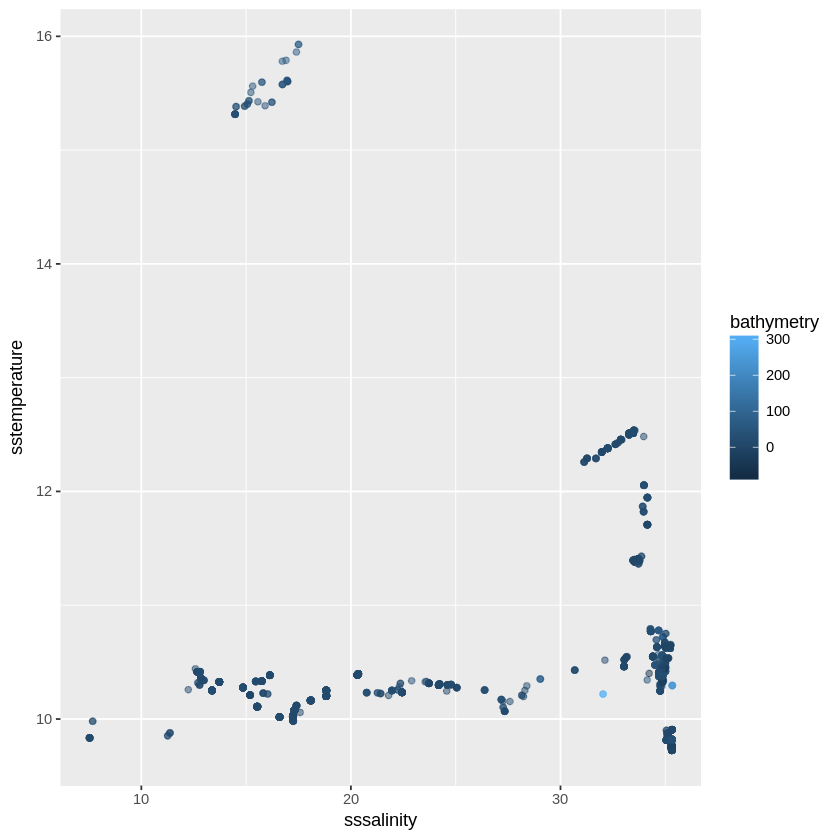

In [18]:
library(ggplot2)

ggplot(xydata, aes(sssalinity, sstemperature, color=bathymetry)) +
    geom_point(alpha=0.5)